**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

In [17]:
%matplotlib inline

# enables in-line manipulation of plots, sucks for running whole notebook, use on per cell basis
# %matplotlib notebook  
%reload_ext autoreload
%autoreload 2

In [18]:
from fastai.conv_learner import *
from fastai.dataset import *

import json, pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
torch.cuda.set_device(0)

In [19]:
torch.backends.cudnn.benchmark=True

In [20]:
torch.cuda.is_available()

True

## Setup

In [21]:
PATH = Path('/maxwellmckinnon/data/pascal')
trn_j = json.load((PATH / 'pascal_train2007.json').open())
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])
trn_ids = [o[ID] for o in trn_j[IMAGES]]

JPEGS = 'VOCdevkit/VOC2007/JPEGImages'
IMG_PATH = PATH/JPEGS

In [22]:
[print(i) for i in PATH.iterdir()]

/maxwellmckinnon/data/pascal/pascal_train2012.json
/maxwellmckinnon/data/pascal/pascal_val2012.json
/maxwellmckinnon/data/pascal/pascal_train2007.json
/maxwellmckinnon/data/pascal/VOCdevkit
/maxwellmckinnon/data/pascal/tmp
/maxwellmckinnon/data/pascal/pascal_val2007.json
/maxwellmckinnon/data/pascal/models
/maxwellmckinnon/data/pascal/pascal_test2007.json


[None, None, None, None, None, None, None, None]

In [23]:
# e.g.
#  {'segmentation': [[240, 193, 240, 299, 295, 299, 295, 193]],
#    'area': 5830,
#    'iscrowd': 0,
#    'image_id': 5,
#    'bbox': [240, 193, 55, 106],
#    'category_id': 9,
#    'id': 4,
#    'ignore': 0},
json.load((PATH/'pascal_val2007.json').open())

{'images': [{'file_name': '000005.jpg', 'height': 375, 'width': 500, 'id': 5},
  {'file_name': '000007.jpg', 'height': 333, 'width': 500, 'id': 7},
  {'file_name': '000009.jpg', 'height': 375, 'width': 500, 'id': 9},
  {'file_name': '000016.jpg', 'height': 500, 'width': 334, 'id': 16},
  {'file_name': '000019.jpg', 'height': 375, 'width': 500, 'id': 19},
  {'file_name': '000020.jpg', 'height': 500, 'width': 375, 'id': 20},
  {'file_name': '000021.jpg', 'height': 500, 'width': 336, 'id': 21},
  {'file_name': '000024.jpg', 'height': 335, 'width': 500, 'id': 24},
  {'file_name': '000030.jpg', 'height': 375, 'width': 500, 'id': 30},
  {'file_name': '000039.jpg', 'height': 375, 'width': 500, 'id': 39},
  {'file_name': '000041.jpg', 'height': 333, 'width': 500, 'id': 41},
  {'file_name': '000046.jpg', 'height': 500, 'width': 332, 'id': 46},
  {'file_name': '000050.jpg', 'height': 375, 'width': 500, 'id': 50},
  {'file_name': '000051.jpg', 'height': 375, 'width': 500, 'id': 51},
  {'file_name

In [24]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [25]:
trn_ids

[12,
 17,
 23,
 26,
 32,
 33,
 34,
 35,
 36,
 42,
 44,
 47,
 48,
 61,
 64,
 66,
 73,
 77,
 78,
 83,
 89,
 91,
 104,
 112,
 122,
 129,
 133,
 134,
 138,
 140,
 141,
 147,
 153,
 154,
 159,
 161,
 162,
 163,
 164,
 171,
 173,
 174,
 187,
 189,
 192,
 193,
 194,
 198,
 200,
 207,
 209,
 219,
 220,
 222,
 225,
 228,
 235,
 242,
 250,
 256,
 259,
 262,
 263,
 276,
 278,
 282,
 288,
 294,
 296,
 306,
 307,
 311,
 312,
 317,
 320,
 325,
 331,
 334,
 337,
 344,
 347,
 349,
 355,
 359,
 367,
 370,
 372,
 379,
 382,
 387,
 391,
 394,
 395,
 400,
 404,
 406,
 407,
 411,
 416,
 430,
 431,
 438,
 446,
 450,
 454,
 463,
 468,
 469,
 470,
 474,
 476,
 477,
 484,
 489,
 496,
 503,
 508,
 516,
 518,
 519,
 522,
 524,
 525,
 526,
 528,
 535,
 537,
 541,
 544,
 549,
 550,
 552,
 554,
 555,
 559,
 565,
 577,
 583,
 589,
 590,
 592,
 597,
 605,
 609,
 612,
 620,
 622,
 625,
 632,
 633,
 635,
 648,
 654,
 657,
 671,
 672,
 680,
 685,
 688,
 689,
 695,
 699,
 700,
 709,
 710,
 711,
 726,
 729,
 731,
 733,
 7

In [26]:
def get_trn_anno():
    trn_anno = collections.defaultdict(lambda:[])
    for o in trn_j[ANNOTATIONS]:
        if not o['ignore']:
            bb = o[BBOX]
            bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
            trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
    return trn_anno

trn_anno = get_trn_anno()

In [131]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks(np.linspace(0, 224, 8))
    ax.set_yticks(np.linspace(0, 224, 8))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [135]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    draw_im(im, im_a)

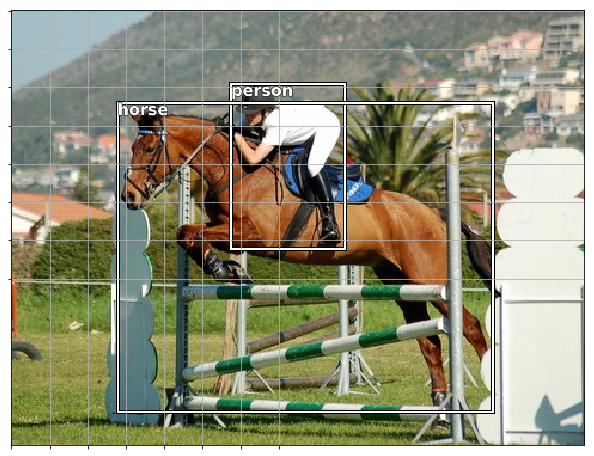

In [136]:
draw_idx(17)

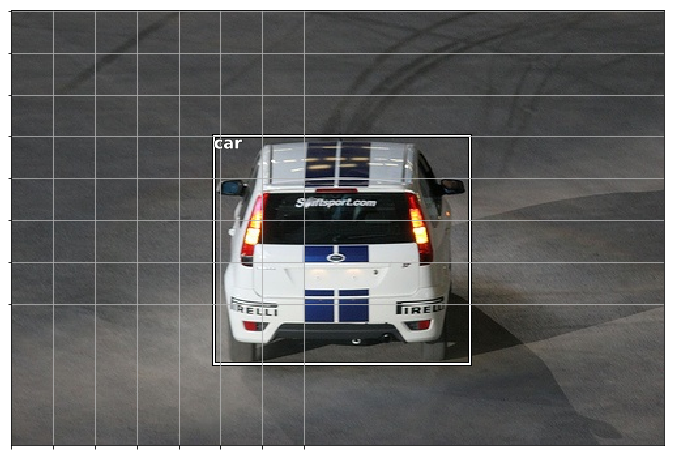

In [137]:
draw_idx(trn_ids[0])

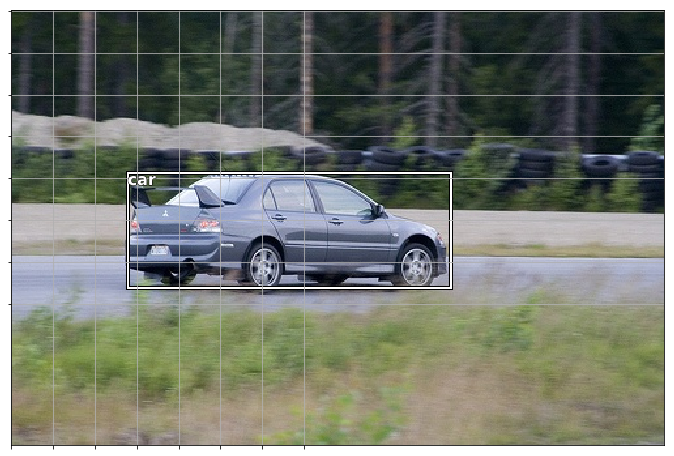

In [31]:
draw_idx(trn_ids[3])

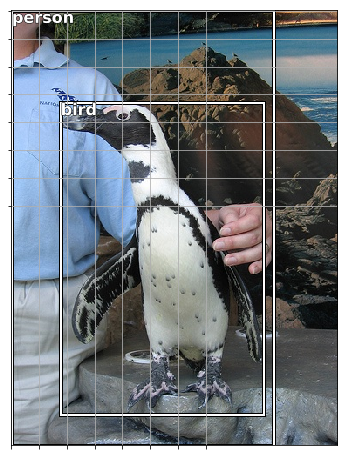

In [32]:
draw_idx(trn_ids[12])

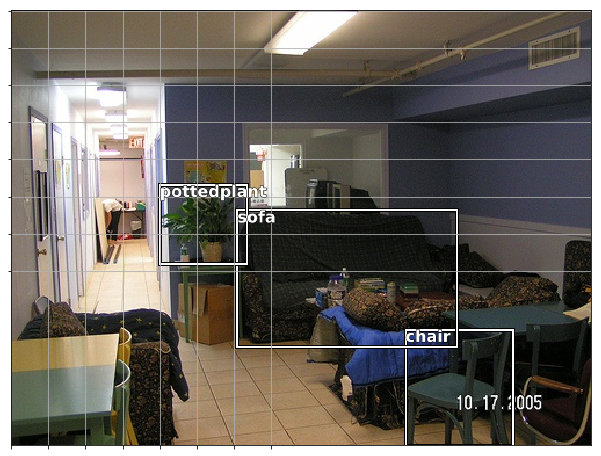

In [33]:
draw_idx(trn_ids[140])

## Multi class

In [34]:
MC_CSV = PATH/'tmp/mc.csv'  # See other notebook for this
MC_CSV

PosixPath('/maxwellmckinnon/data/pascal/tmp/mc.csv')

In [35]:
trn_anno[12]

[(array([ 96, 155, 269, 350]), 7)]

In [36]:
mc = [set([cats[p[1]] for p in trn_anno[o]]) for o in trn_ids]
mcs = [' '.join(str(p) for p in o) for o in mc]

In [37]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'clas': mcs}, columns=['fn','clas'])
df.to_csv(MC_CSV, index=False)

In [38]:
f_model=resnet34
sz=224
bs=64

In [39]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, MC_CSV, tfms=tfms, bs=bs)

In [40]:
learn = ConvLearner.pretrained(f_model, md)
learn.opt_fn = optim.Adam

In [41]:
lrf=learn.lr_find(1e-5,100)

epoch      trn_loss   val_loss   <lambda>                  
    0      1.533022   5.669886   0.7948    



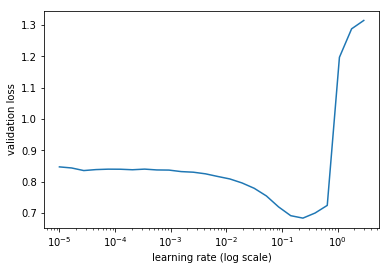

In [42]:
learn.sched.plot(0)

In [43]:
lr = 2e-2

In [44]:
learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

epoch      trn_loss   val_loss   <lambda>                  
    0      0.322135   0.134573   0.9526    
    1      0.173357   0.080194   0.9726                    
    2      0.116653   0.075987   0.9748                    



[array([0.07599]), 0.974799997806549]

In [45]:
lrs = np.array([lr/100, lr/10, lr])

In [46]:
learn.freeze_to(-2)

 84%|████████▍ | 27/32 [00:18<00:01,  2.94it/s, loss=0.25]  

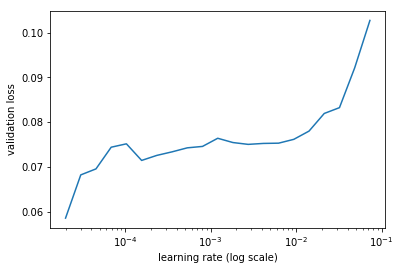

In [47]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [48]:
learn.fit(lrs/10, 1, cycle_len=5, use_clr=(32,5))

epoch      trn_loss   val_loss   <lambda>                   
    0      0.073266   0.079189   0.9734    
    1      0.055471   0.08182    0.9732                     
    2      0.039863   0.076963   0.9748                     
    3      0.027846   0.078061   0.9754                     
    4      0.019574   0.07611    0.9759                     


[array([0.07611]), 0.9758999943733215]

In [49]:
learn.save('mclas')

In [50]:
learn.load('mclas')

In [51]:
y = learn.predict()
x,_ = next(iter(md.val_dl))
x = to_np(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


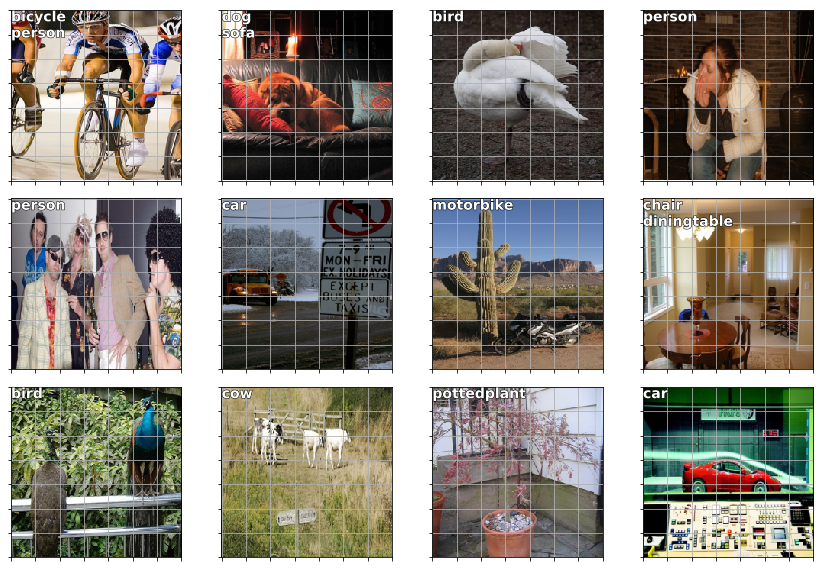

In [52]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    ya = np.nonzero(y[i]>0.4)[0]
    b = '\n'.join(md.classes[o] for o in ya)
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

## Bbox per cell

### Set up data

In [53]:
CLAS_CSV = PATH/'tmp/clas.csv'
MBB_CSV = PATH/'tmp/mbb.csv'

f_model=resnet34
sz=224
bs=64

In [54]:
mc = [[cats[p[1]] for p in trn_anno[o]] for o in trn_ids]
id2cat = list(cats.values())
cat2id = {v:k for k,v in enumerate(id2cat)}
mcs = np.array([np.array([cat2id[p] for p in o]) for o in mc]); mcs

array([array([6]), array([14, 12]), array([ 1,  1, 14, 14, 14]), ..., array([17,  8, 14, 14, 14]),
       array([6]), array([11])], dtype=object)

In [55]:
val_idxs = get_cv_idxs(len(trn_fns))
((val_mcs,trn_mcs),) = split_by_idx(val_idxs, mcs)

In [56]:
mbb = [np.concatenate([p[0] for p in trn_anno[o]]) for o in trn_ids]
mbbs = [' '.join(str(p) for p in o) for o in mbb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': mbbs}, columns=['fn','bbox'])
df.to_csv(MBB_CSV, index=False)

In [57]:
df.head()

fn                                               bbox
0  000012.jpg                                     96 155 269 350
1  000017.jpg                       61 184 198 278 77 89 335 402
2  000023.jpg  229 8 499 244 219 229 499 333 0 1 368 116 1 2 ...
3  000026.jpg                                     124 89 211 336
4  000032.jpg  77 103 182 374 87 132 122 196 179 194 228 212 ...

In [58]:
aug_tfms = [RandomRotate(3, p=0.5, tfm_y=TfmType.COORD),
            RandomLighting(0.05, 0.05, tfm_y=TfmType.COORD),
            RandomFlip(tfm_y=TfmType.COORD)]
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=aug_tfms)
md = ImageClassifierData.from_csv(PATH, JPEGS, MBB_CSV, tfms=tfms, bs=bs, continuous=True, num_workers=4)

In [59]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

num_colr = 12
cmap = get_cmap(num_colr)
colr_list = [cmap(float(x)) for x in range(num_colr)]

In [60]:
def show_ground_truth(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>0) and (pr is None or pr > thresh)):
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{i}: '
            if c is not None: txt += ('bg' if c==len(id2cat) else id2cat[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2], txt, color=colr_list[i%num_colr])

In [61]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2):
        self.ds,self.y2 = ds,y2
        self.sz = ds.sz
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

In [62]:
trn_ds2 = ConcatLblDataset(md.trn_ds, trn_mcs)
val_ds2 = ConcatLblDataset(md.val_ds, val_mcs)
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

In [63]:
x,y=to_np(next(iter(md.val_dl)))
x=md.val_ds.ds.denorm(x)

In [64]:
x,y=to_np(next(iter(md.trn_dl)))
x=md.trn_ds.ds.denorm(x)

In [129]:
def show_ground_truth(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    import ipdb; ipdb.set_trace()
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>0) and (pr is None or pr > thresh)):
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{i}: '
            if c is not None: txt += ('bg' if c==len(id2cat) else id2cat[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2], txt, color=colr_list[i%num_colr])

> <ipython-input-129-50f7b07a8a39>(3)show_ground_truth()
      2     import ipdb; ipdb.set_trace()
----> 3     bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
      4     if prs is None:  prs  = [None]*len(bb)

ipdb> bb
*** NameError: name 'bb' is not defined
ipdb> bb_how
*** NameError: name 'bb_how' is not defined
ipdb> bbox
array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  91.,  47., 223., 169.,   0.,  49., 205.,
       180.,   9., 169., 217., 222.], dtype=float32)
ipdb> bbox.shape
(56,)
ipdb> bbox.reshape(-1,4)
array([[  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0

BdbQuit: 

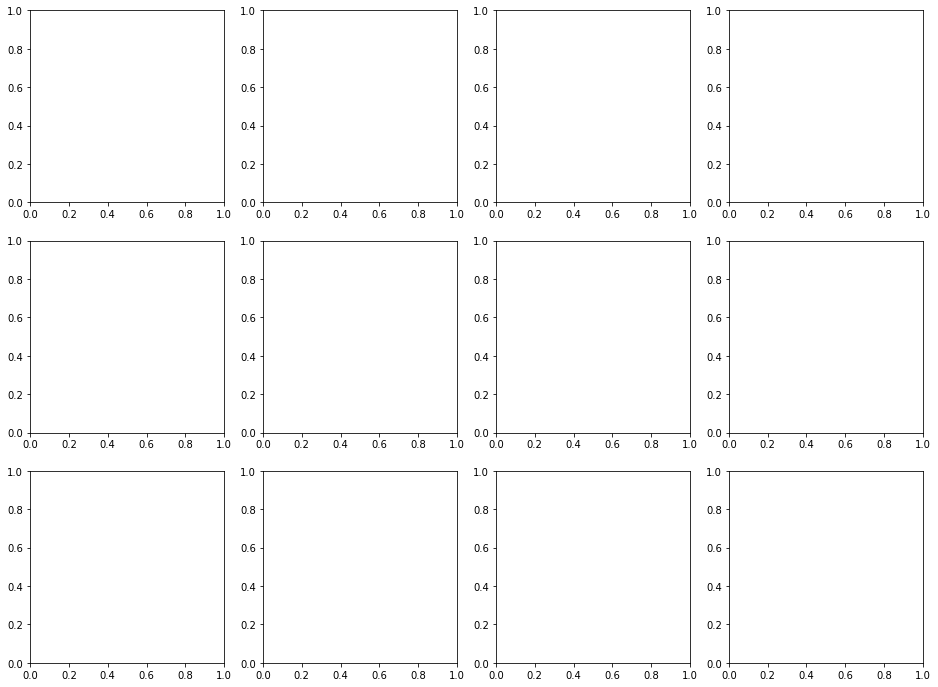

In [130]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    show_ground_truth(ax, x[i], y[0][i], y[1][i])
plt.tight_layout()

### Set up model

We're going to make a simple first model that simply predicts what object is located in each cell of a 4x4 grid. Later on we can try to improve this.

In [66]:
np.repeat(5,10)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [67]:
np.array(5)*10

50

In [68]:
np.linspace(1,10,endpoint=True, num=10) + 20

array([21., 22., 23., 24., 25., 26., 27., 28., 29., 30.])

<IPython.core.display.Javascript object>


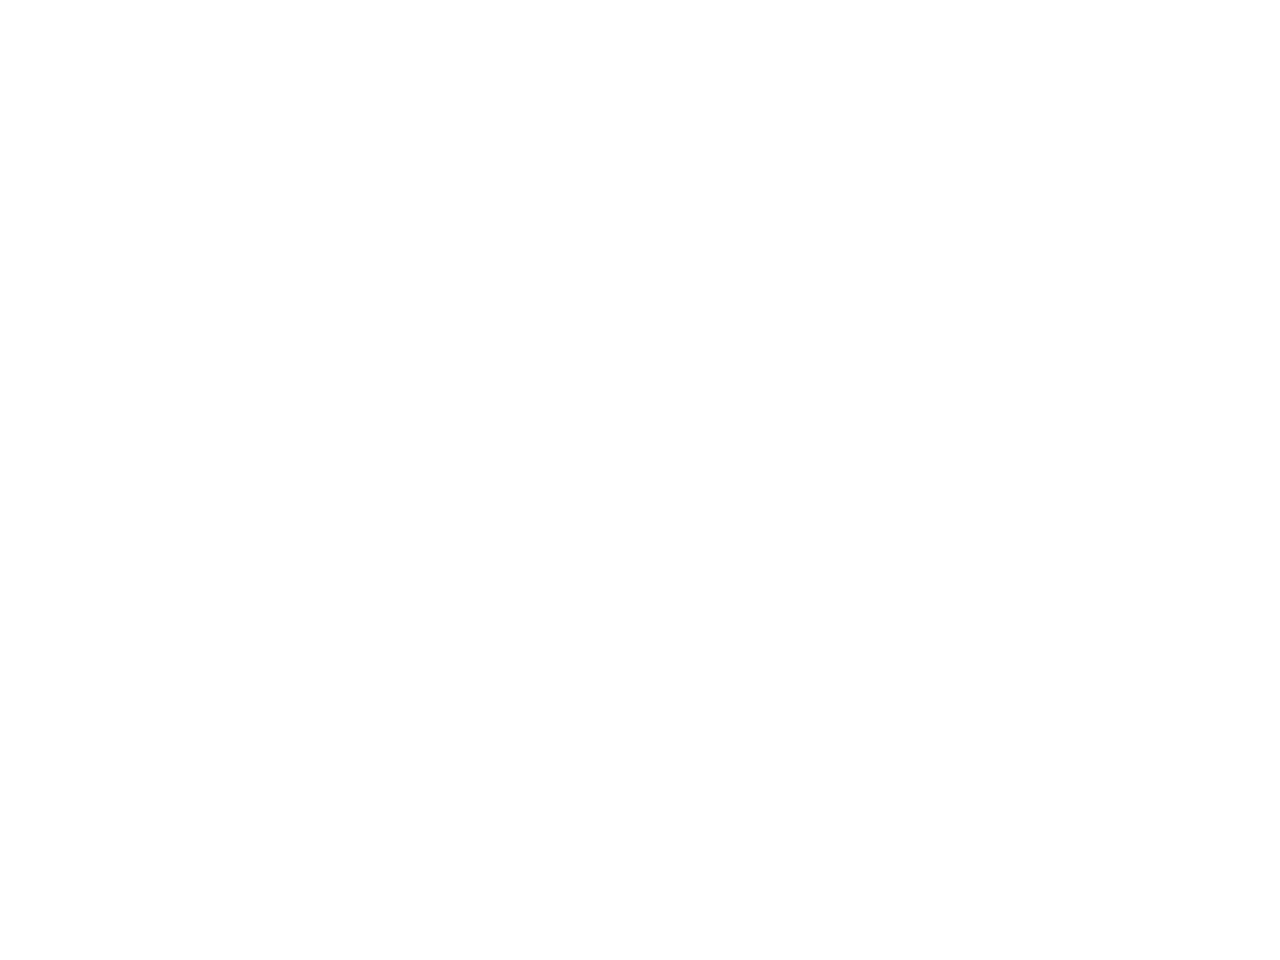

In [69]:
%matplotlib notebook
zzt = np.linspace(0, 100, num=1000)
zzf = 92
zzy = np.sin(2*np.pi*zzf*zzt + 0)
plt.plot(zzt, zzy)

In [70]:
anc_grid = 4
k = 1

anc_offset = 1/(anc_grid*2)
anc_x = np.repeat(np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid)
anc_y = np.tile(np.linspace(anc_offset, 1-anc_offset, anc_grid), anc_grid)

anc_ctrs = np.tile(np.stack([anc_x,anc_y], axis=1), (k,1))
anc_sizes = np.array([[1/anc_grid,1/anc_grid] for i in range(anc_grid*anc_grid)])
anchors = V(np.concatenate([anc_ctrs, anc_sizes], axis=1), requires_grad=False).float()

In [71]:
grid_sizes = V(np.array([1/anc_grid]), requires_grad=False).unsqueeze(1)

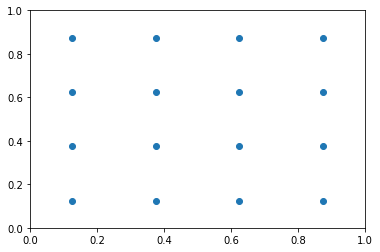

In [72]:
%matplotlib inline
plt.scatter(anc_x, anc_y)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [73]:
anchors

Variable containing:
 0.1250  0.1250  0.2500  0.2500
 0.1250  0.3750  0.2500  0.2500
 0.1250  0.6250  0.2500  0.2500
 0.1250  0.8750  0.2500  0.2500
 0.3750  0.1250  0.2500  0.2500
 0.3750  0.3750  0.2500  0.2500
 0.3750  0.6250  0.2500  0.2500
 0.3750  0.8750  0.2500  0.2500
 0.6250  0.1250  0.2500  0.2500
 0.6250  0.3750  0.2500  0.2500
 0.6250  0.6250  0.2500  0.2500
 0.6250  0.8750  0.2500  0.2500
 0.8750  0.1250  0.2500  0.2500
 0.8750  0.3750  0.2500  0.2500
 0.8750  0.6250  0.2500  0.2500
 0.8750  0.8750  0.2500  0.2500
[torch.cuda.FloatTensor of size 16x4 (GPU 0)]

In [74]:
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

In [75]:
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
anchor_cnr

Variable containing:
 0.0000  0.0000  0.2500  0.2500
 0.0000  0.2500  0.2500  0.5000
 0.0000  0.5000  0.2500  0.7500
 0.0000  0.7500  0.2500  1.0000
 0.2500  0.0000  0.5000  0.2500
 0.2500  0.2500  0.5000  0.5000
 0.2500  0.5000  0.5000  0.7500
 0.2500  0.7500  0.5000  1.0000
 0.5000  0.0000  0.7500  0.2500
 0.5000  0.2500  0.7500  0.5000
 0.5000  0.5000  0.7500  0.7500
 0.5000  0.7500  0.7500  1.0000
 0.7500  0.0000  1.0000  0.2500
 0.7500  0.2500  1.0000  0.5000
 0.7500  0.5000  1.0000  0.7500
 0.7500  0.7500  1.0000  1.0000
[torch.cuda.FloatTensor of size 16x4 (GPU 0)]

In [76]:
n_clas = len(id2cat)+1
n_act = k*(4+n_clas)

In [77]:
class StdConv(nn.Module):
    def __init__(self, nin, nout, stride=2, drop=0.1):
        super().__init__()
        self.conv = nn.Conv2d(nin, nout, 3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(nout)
        self.drop = nn.Dropout(drop)
        
    def forward(self, x): return self.drop(self.bn(F.relu(self.conv(x))))
        
def flatten_conv(x,k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

In [78]:
# Two tasks conv1 and conv2 share every layer except the last one

class OutConv(nn.Module):
    def __init__(self, k, nin, bias):
        super().__init__()
        self.k = k
        self.oconv1 = nn.Conv2d(nin, (len(id2cat)+1)*k, 3, padding=1)  # Classes
        self.oconv2 = nn.Conv2d(nin, 4*k, 3, padding=1)  # Bounding boxes
        self.oconv1.bias.data.zero_().add_(bias)
        
    def forward(self, x):
        return [flatten_conv(self.oconv1(x), self.k),
                flatten_conv(self.oconv2(x), self.k)]

In [79]:
class SSD_Head(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(0.25)
        self.sconv0 = StdConv(512,256, stride=1)
#         self.sconv1 = StdConv(256,256)
        self.sconv2 = StdConv(256,256)
        self.out = OutConv(k, 256, bias)
        
    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
#         x = self.sconv1(x)
        x = self.sconv2(x)
        return self.out(x)

head_reg4 = SSD_Head(k, -3.)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
k

1

### Train

In [80]:
def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes+1)
        t = V(t[:,:-1].contiguous())#.cpu()
        x = pred[:,:-1]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x, t, w, size_average=False)/self.num_classes
    
    def get_weight(self,x,t): return None

loss_f = BCE_Loss(len(id2cat))

In [81]:
def intersect(box_a, box_b):
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

In [82]:
def get_y(bbox,clas):
    bbox = bbox.view(-1,4)/sz
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return bbox[bb_keep],clas[bb_keep]

def actn_to_bb(actn, anchors):
    actn_bbs = torch.tanh(actn)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2]
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

def map_to_ground_truth(overlaps, print_it=False):
    prior_overlap, prior_idx = overlaps.max(1)
    if print_it: print(prior_overlap)
#     pdb.set_trace()
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

def ssd_1_loss(b_c,b_bb,bbox,clas,print_it=False):
    bbox,clas = get_y(bbox,clas)
    a_ic = actn_to_bb(b_bb, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data)
    gt_overlap,gt_idx = map_to_ground_truth(overlaps,print_it)
    gt_clas = clas[gt_idx]
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[1-pos] = len(id2cat)
    gt_bbox = bbox[gt_idx]
    loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
    clas_loss  = loss_f(b_c, gt_clas)
    return loc_loss, clas_loss

def ssd_loss(pred,targ,print_it=False):
    lcs,lls = 0.,0.
    for b_c,b_bb,bbox,clas in zip(*pred,*targ):
        loc_loss,clas_loss = ssd_1_loss(b_c,b_bb,bbox,clas,print_it)
        lls += loc_loss
        lcs += clas_loss
    if print_it: print(f'loc: {lls.data[0]}, clas: {lcs.data[0]}')
    return lls+lcs

In [83]:
x,y = next(iter(md.val_dl))
# x,y = V(x).cpu(),V(y)
x,y = V(x),V(y)

In [84]:
for i,o in enumerate(y): y[i] = o.cuda()
learn.model.cuda()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [85]:
batch = learn.model(x)

In [86]:
 # uncomment to debug on cpu
#anchors = anchors.cpu(); grid_sizes = grid_sizes.cpu(); anchor_cnr = anchor_cnr.cpu()

In [87]:
ssd_loss(batch, y, True)


 0.1947
 0.1168
 0.2652
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.2885
 0.0888
[torch.cuda.FloatTensor of size 2 (GPU 0)]


1.00000e-02 *
  9.9027
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1608
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.3237
 0.2153
 0.2558
 0.2013
 0.2526
 0.0485
 0.0879
[torch.cuda.FloatTensor of size 7 (GPU 0)]


 0.3258
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.2704
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.3985
 0.4538
 0.1897
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.1527
 0.1863
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.3426
 0.3249
 0.5062
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.0642
 0.2506
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.2027
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.2418
 0.2337
 0.2590
[torch.cuda.FloatTensor of size 3 (GPU 0)]


1.00000e-02 *
  8.4642
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.3652
 0.1377
[torch.cuda.FloatTensor of size 2 (GPU 0)]


1.00000e-02 *
  9.5146
  5.739

Variable containing:
 83.9654
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [88]:
learn.crit = ssd_loss
lr = 3e-3
lrs = np.array([lr/100,lr/10,lr])

epoch      trn_loss   val_loss                            
    0      89.56419   27948.551469


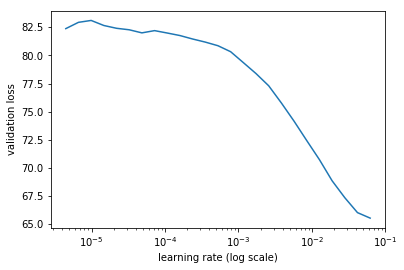

In [89]:
learn.lr_find(lrs/1000,1.)
learn.sched.plot(1)

In [90]:
learn.fit(lr, 1, cycle_len=5, use_clr=(20,10))

epoch      trn_loss   val_loss                            
    0      42.615996  32.169452 
    1      33.206763  29.082049                           
    2      29.05751   26.973803                           
    3      26.394625  26.299477                           
    4      24.183392  25.978068                           


[array([25.97807])]

In [91]:
learn.save('0')

In [92]:
learn.load('0')

### Testing

In [93]:
x,y = next(iter(md.val_dl))
x,y = V(x),V(y)
learn.model.eval()
batch = learn.model(x)
b_clas,b_bb = batch

In [94]:
b_clas.size(),b_bb.size()

(torch.Size([64, 16, 21]), torch.Size([64, 16, 4]))

In [95]:
idx=7
b_clasi = b_clas[idx]
b_bboxi = b_bb[idx]
ima=md.val_ds.ds.denorm(to_np(x))[idx]
bbox,clas = get_y(y[0][idx], y[1][idx])
bbox,clas

(Variable containing:
  0.6786  0.4866  0.9911  0.6250
  0.7098  0.0848  0.9911  0.5491
  0.5134  0.8304  0.6696  0.9063
 [torch.cuda.FloatTensor of size 3x4 (GPU 0)], Variable containing:
   8
  10
  17
 [torch.cuda.LongTensor of size 3 (GPU 0)])

In [96]:
def torch_gt(ax, ima, bbox, clas, prs=None, thresh=0.4):
    return show_ground_truth(ax, ima, to_np((bbox*224).long()),
         to_np(clas), to_np(prs) if prs is not None else None, thresh)

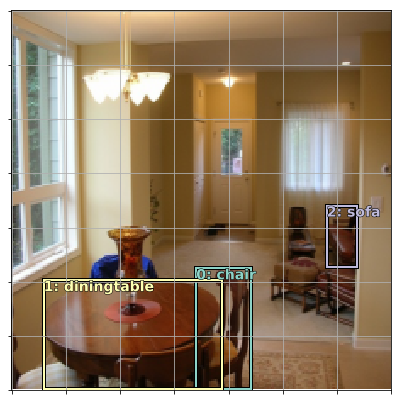

In [97]:
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, bbox, clas)

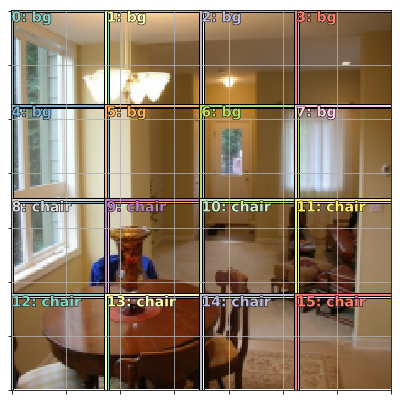

In [98]:
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, anchor_cnr, b_clasi.max(1)[1])

In [99]:
grid_sizes

Variable containing:
 0.2500
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

In [100]:
anchors

Variable containing:
 0.1250  0.1250  0.2500  0.2500
 0.1250  0.3750  0.2500  0.2500
 0.1250  0.6250  0.2500  0.2500
 0.1250  0.8750  0.2500  0.2500
 0.3750  0.1250  0.2500  0.2500
 0.3750  0.3750  0.2500  0.2500
 0.3750  0.6250  0.2500  0.2500
 0.3750  0.8750  0.2500  0.2500
 0.6250  0.1250  0.2500  0.2500
 0.6250  0.3750  0.2500  0.2500
 0.6250  0.6250  0.2500  0.2500
 0.6250  0.8750  0.2500  0.2500
 0.8750  0.1250  0.2500  0.2500
 0.8750  0.3750  0.2500  0.2500
 0.8750  0.6250  0.2500  0.2500
 0.8750  0.8750  0.2500  0.2500
[torch.cuda.FloatTensor of size 16x4 (GPU 0)]

In [101]:
a_ic = actn_to_bb(b_bboxi, anchors)

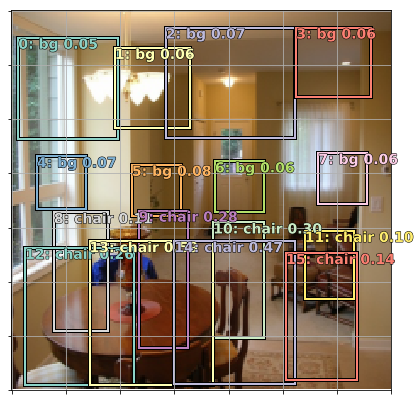

In [102]:
fig, ax = plt.subplots(figsize=(7,7))
torch_gt(ax, ima, a_ic, b_clasi.max(1)[1], b_clasi.max(1)[0].sigmoid(), thresh=0.0)

In [103]:
overlaps = jaccard(bbox.data, anchor_cnr.data)
overlaps



Columns 0 to 9 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0091
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0356  0.0549
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000

Columns 10 to 15 
 0.0922  0.0000  0.0000  0.0315  0.3985  0.0000
 0.0103  0.0000  0.2598  0.4538  0.0653  0.0000
 0.0000  0.1897  0.0000  0.0000  0.0000  0.0000
[torch.cuda.FloatTensor of size 3x16 (GPU 0)]

In [104]:
overlaps.max(1)

(
  0.3985
  0.4538
  0.1897
 [torch.cuda.FloatTensor of size 3 (GPU 0)], 
  14
  13
  11
 [torch.cuda.LongTensor of size 3 (GPU 0)])

In [105]:
overlaps.max(0)

(
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0356
  0.0549
  0.0922
  0.1897
  0.2598
  0.4538
  0.3985
  0.0000
 [torch.cuda.FloatTensor of size 16 (GPU 0)], 
  0
  0
  0
  0
  0
  0
  0
  0
  1
  1
  0
  2
  1
  1
  0
  0
 [torch.cuda.LongTensor of size 16 (GPU 0)])

In [106]:
gt_overlap,gt_idx = map_to_ground_truth(overlaps)
gt_overlap,gt_idx

(
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0000
  0.0356
  0.0549
  0.0922
  1.9900
  0.2598
  1.9900
  1.9900
  0.0000
 [torch.cuda.FloatTensor of size 16 (GPU 0)], 
  0
  0
  0
  0
  0
  0
  0
  0
  1
  1
  0
  2
  1
  1
  0
  0
 [torch.cuda.LongTensor of size 16 (GPU 0)])

In [107]:
gt_clas = clas[gt_idx]; gt_clas

Variable containing:
  8
  8
  8
  8
  8
  8
  8
  8
 10
 10
  8
 17
 10
 10
  8
  8
[torch.cuda.LongTensor of size 16 (GPU 0)]

In [108]:
thresh = 0.5
pos = gt_overlap > thresh
pos_idx = torch.nonzero(pos)[:,0]
neg_idx = torch.nonzero(1-pos)[:,0]
pos_idx


 11
 13
 14
[torch.cuda.LongTensor of size 3 (GPU 0)]

In [109]:
gt_clas[1-pos] = len(id2cat)
[id2cat[o] if o<len(id2cat) else 'bg' for o in gt_clas.data]

['bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'bg',
 'sofa',
 'bg',
 'diningtable',
 'chair',
 'bg']

In [110]:
gt_bbox = bbox[gt_idx]
loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
clas_loss  = F.cross_entropy(b_clasi, gt_clas)
loc_loss,clas_loss

(Variable containing:
 1.00000e-02 *
   6.0232
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
  1.1143
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


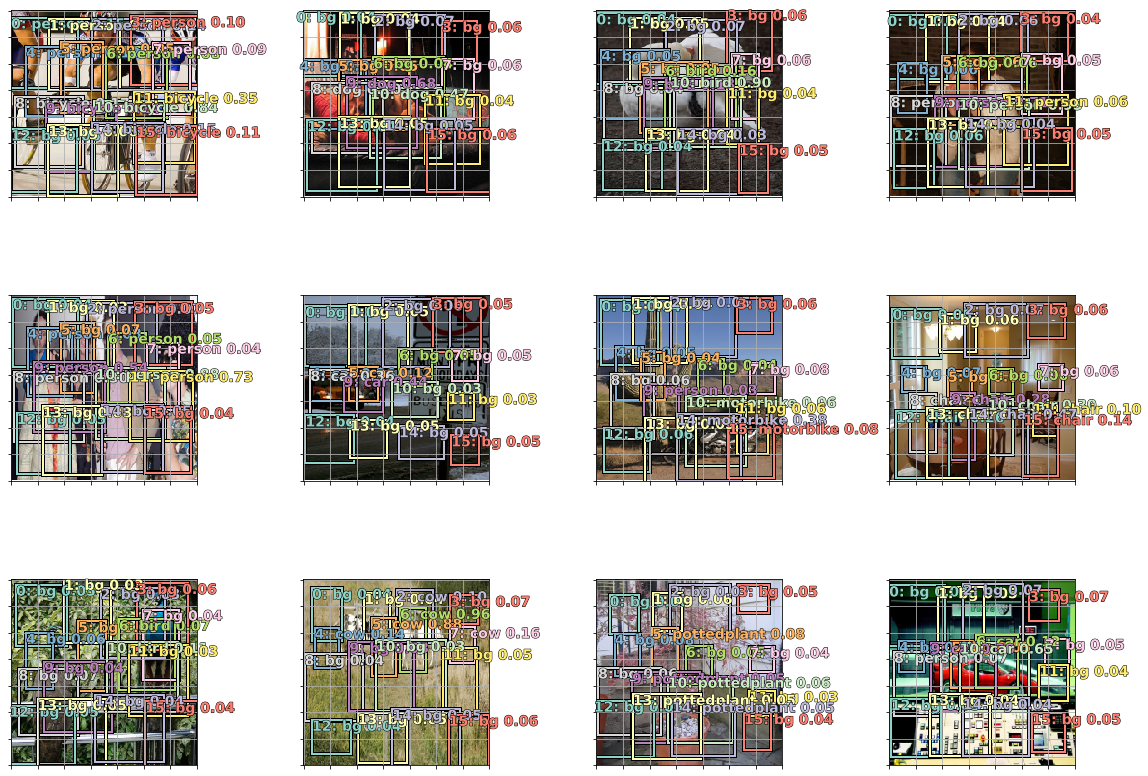

In [111]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for idx,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[idx]
    bbox,clas = get_y(y[0][idx], y[1][idx])
    ima=md.val_ds.ds.denorm(to_np(x))[idx]
    bbox,clas = get_y(bbox,clas); bbox,clas
    a_ic = actn_to_bb(b_bb[idx], anchors)
    torch_gt(ax, ima, a_ic, b_clas[idx].max(1)[1], b_clas[idx].max(1)[0].sigmoid(), 0.01)
plt.tight_layout()

## More anchors!

### Create anchors

In [112]:
anc_grids = [4,2,1]
# anc_grids = [2]
anc_zooms = [0.7, 1., 1.3]
# anc_zooms = [1.]
anc_ratios = [(1.,1.), (1.,0.5), (0.5,1.)]
# anc_ratios = [(1.,1.)]
anchor_scales = [(anz*i,anz*j) for anz in anc_zooms for (i,j) in anc_ratios]
k = len(anchor_scales)
anc_offsets = [1/(o*2) for o in anc_grids]
k

9

In [113]:
anc_x = np.concatenate([np.repeat(np.linspace(ao, 1-ao, ag), ag)
                        for ao,ag in zip(anc_offsets,anc_grids)])
anc_y = np.concatenate([np.tile(np.linspace(ao, 1-ao, ag), ag)
                        for ao,ag in zip(anc_offsets,anc_grids)])
anc_ctrs = np.repeat(np.stack([anc_x,anc_y], axis=1), k, axis=0)

In [114]:
anc_sizes  =   np.concatenate([np.array([[o/ag,p/ag] for i in range(ag*ag) for o,p in anchor_scales])
               for ag in anc_grids])
grid_sizes = V(np.concatenate([np.array([ 1/ag       for i in range(ag*ag) for o,p in anchor_scales])
               for ag in anc_grids]), requires_grad=False).unsqueeze(1)
anchors = V(np.concatenate([anc_ctrs, anc_sizes], axis=1), requires_grad=False).float()
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])

In [115]:
anchors

Variable containing:
 0.1250  0.1250  0.1750  0.1750
 0.1250  0.1250  0.1750  0.0875
 0.1250  0.1250  0.0875  0.1750
 0.1250  0.1250  0.2500  0.2500
 0.1250  0.1250  0.2500  0.1250
 0.1250  0.1250  0.1250  0.2500
 0.1250  0.1250  0.3250  0.3250
 0.1250  0.1250  0.3250  0.1625
 0.1250  0.1250  0.1625  0.3250
 0.1250  0.3750  0.1750  0.1750
 0.1250  0.3750  0.1750  0.0875
 0.1250  0.3750  0.0875  0.1750
 0.1250  0.3750  0.2500  0.2500
 0.1250  0.3750  0.2500  0.1250
 0.1250  0.3750  0.1250  0.2500
 0.1250  0.3750  0.3250  0.3250
 0.1250  0.3750  0.3250  0.1625
 0.1250  0.3750  0.1625  0.3250
 0.1250  0.6250  0.1750  0.1750
 0.1250  0.6250  0.1750  0.0875
 0.1250  0.6250  0.0875  0.1750
 0.1250  0.6250  0.2500  0.2500
 0.1250  0.6250  0.2500  0.1250
 0.1250  0.6250  0.1250  0.2500
 0.1250  0.6250  0.3250  0.3250
 0.1250  0.6250  0.3250  0.1625
 0.1250  0.6250  0.1625  0.3250
 0.1250  0.8750  0.1750  0.1750
 0.1250  0.8750  0.1750  0.0875
 0.1250  0.8750  0.0875  0.1750
 0.1250  0.8750  0.

In [116]:
x,y=to_np(next(iter(md.val_dl)))
x=md.val_ds.ds.denorm(x)

In [117]:
a=np.reshape((to_np(anchor_cnr) + to_np(torch.randn(*anchor_cnr.size()))*0.01)*224, -1)

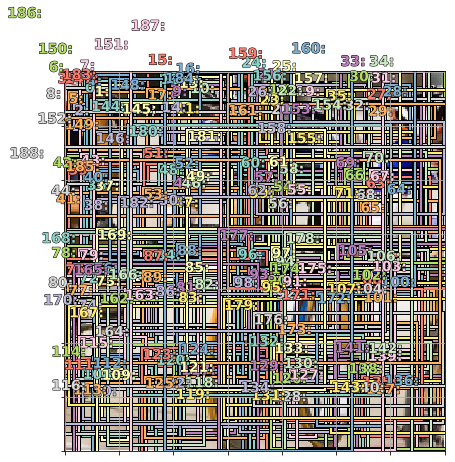

In [118]:
fig, ax = plt.subplots(figsize=(7,7))
show_ground_truth(ax, x[0], a)

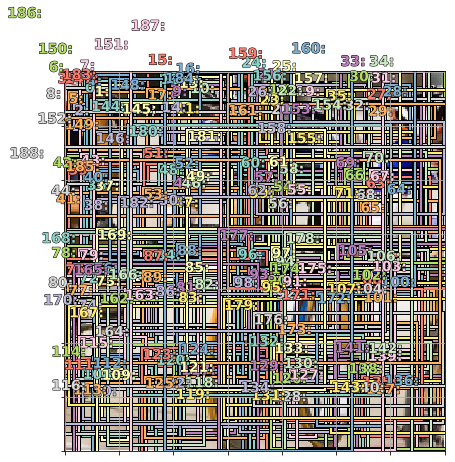

In [119]:
fig, ax = plt.subplots(figsize=(7,7))
show_ground_truth(ax, x[0], a)

### Model

In [172]:
drop=0.4

class SSD_MultiHead(nn.Module):
    def __init__(self, k, bias):
        super().__init__()
        self.drop = nn.Dropout(drop)
        self.sconv0 = StdConv(512,256, stride=1, drop=drop)
        self.sconv1 = StdConv(256,256, drop=drop)
        self.sconv2 = StdConv(256,256, drop=drop)
        self.sconv3 = StdConv(256,256, drop=drop)
        self.out0 = OutConv(k, 256, bias)
        self.out1 = OutConv(k, 256, bias)
        self.out2 = OutConv(k, 256, bias)
        self.out3 = OutConv(k, 256, bias)

    def forward(self, x):
        x = self.drop(F.relu(x))
        x = self.sconv0(x)
        x = self.sconv1(x)
        o1c,o1l = self.out1(x)
        
        #2x2 outputs
        x = self.sconv2(x)
        o2c,o2l = self.out2(x)
        
        #1x1 outputs
        x = self.sconv3(x)
        o3c,o3l = self.out3(x)
        return [torch.cat([o1c,o2c,o3c], dim=1),
                torch.cat([o1l,o2l,o3l], dim=1)]

head_reg4 = SSD_MultiHead(k, -4.)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [173]:
learn.crit = ssd_loss
lr = 1e-2
lrs = np.array([lr/100,lr/10,lr])

In [174]:
x,y = next(iter(md.val_dl))
x,y = V(x),V(y)
batch = learn.model(V(x))

In [175]:
batch[0].size(),batch[1].size()

(torch.Size([64, 189, 21]), torch.Size([64, 189, 4]))

In [176]:
ssd_loss(batch, y, True)


 0.5598
 0.7922
 0.3095
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.6075
 0.7035
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.7764
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.7268
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.5163
 0.4763
 0.3709
 0.4986
 0.2990
 0.0887
 0.1046
[torch.cuda.FloatTensor of size 7 (GPU 0)]


 0.3789
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.5153
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.3985
 0.6215
 0.5742
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.4246
 0.5208
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.3426
 0.3257
 0.5062
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.9734
 0.2506
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.4477
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.7722
 0.5177
 0.6392
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.7384
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.4679
 0.8901
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.6597
 0.1221
[torch.cuda.FloatTensor of size 2 (GPU 0)]



Variable containing:
 330.4357
[torch.cuda.FloatTensor of size 1 (GPU 0)]

epoch      trn_loss   val_loss                           
    0      416.46077  6741095.732


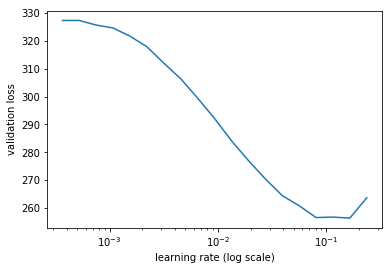

In [177]:
learn.lr_find(lrs/1000,1.)
learn.sched.plot(n_skip_end=2)

In [178]:
learn.fit(lrs, 1, cycle_len=4, use_clr=(20,8))

epoch      trn_loss   val_loss                           
    0      158.790787 133.776541
    1      125.704422 100.219539                         
    2      108.03317  92.940696                          
    3      96.115157  87.412177                           


[array([87.41218])]

In [179]:
learn.save('tmp')

In [180]:
learn.freeze_to(-2)
learn.fit(lrs/2, 1, cycle_len=4, use_clr=(20,8))

epoch      trn_loss   val_loss                            
    0      91.039671  110.336047
    1      86.088877  86.002782                           
    2      78.074917  80.995473                           
    3      70.345033  77.366579                           


[array([77.36658])]

In [181]:
learn.save('prefocal')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


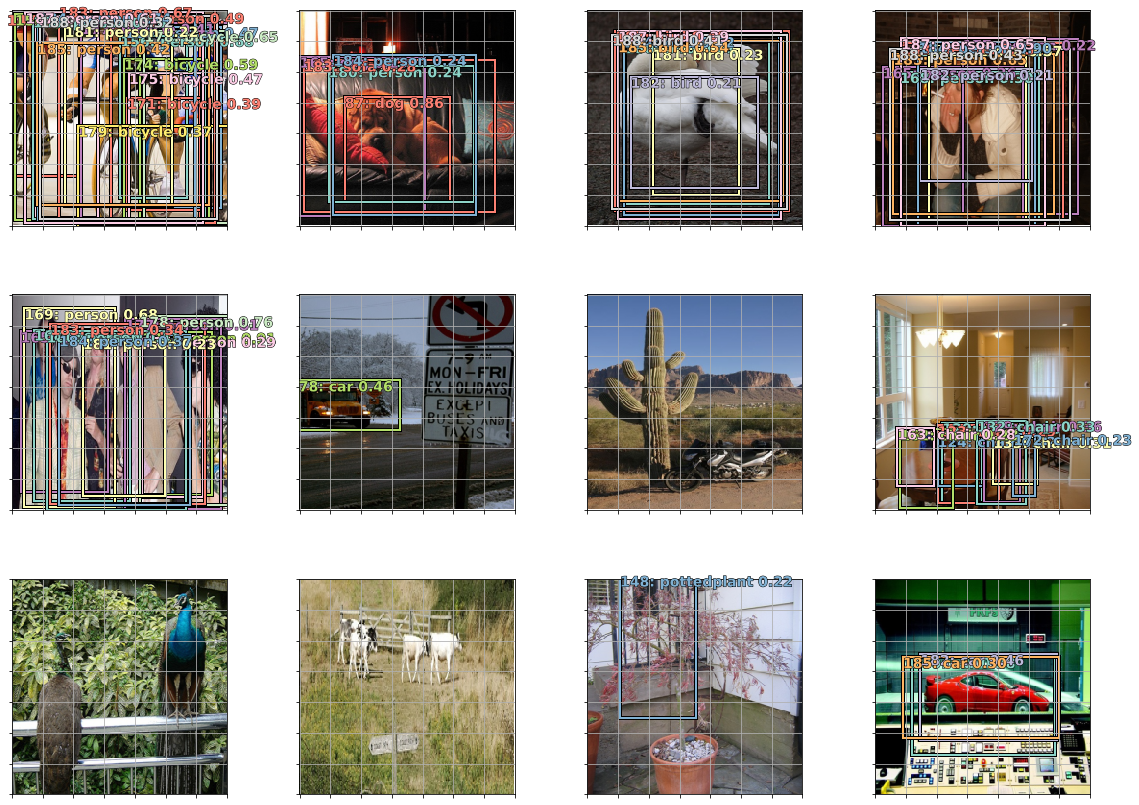

In [182]:
x,y = next(iter(md.val_dl))
y = V(y)
batch = learn.model(V(x))
b_clas,b_bb = batch
x = to_np(x)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for idx,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(x)[idx]
    bbox,clas = get_y(y[0][idx], y[1][idx])
    a_ic = actn_to_bb(b_bb[idx], anchors)
    torch_gt(ax, ima, a_ic, b_clas[idx].max(1)[1], b_clas[idx].max(1)[0].sigmoid(), 0.21)
plt.tight_layout()

## Focal loss

In [183]:
def plot_results(thresh):
    x,y = next(iter(md.val_dl))
    y = V(y)
    batch = learn.model(V(x))
    b_clas,b_bb = batch

    x = to_np(x)
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    for idx,ax in enumerate(axes.flat):
        ima=md.val_ds.ds.denorm(x)[idx]
        bbox,clas = get_y(y[0][idx], y[1][idx])
        a_ic = actn_to_bb(b_bb[idx], anchors)
        clas_pr, clas_ids = b_clas[idx].max(1)
        clas_pr = clas_pr.sigmoid()
        torch_gt(ax, ima, a_ic, clas_ids, clas_pr, clas_pr.max().data[0]*thresh)
    plt.tight_layout()

In [184]:
class FocalLoss(BCE_Loss):
    def get_weight(self,x,t):
        alpha,gamma = 0.25,1
        p = x.sigmoid()
        pt = p*t + (1-p)*(1-t)
        w = alpha*t + (1-alpha)*(1-t)
        return w * (1-pt).pow(gamma)

loss_f = FocalLoss(len(id2cat))

In [185]:
x,y = next(iter(md.val_dl))
x,y = V(x),V(y)
batch = learn.model(x)
ssd_loss(batch, y, True)


 0.5598
 0.7922
 0.3095
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.6075
 0.7035
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.7764
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.7268
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.5163
 0.4763
 0.3709
 0.4986
 0.2990
 0.0887
 0.1046
[torch.cuda.FloatTensor of size 7 (GPU 0)]


 0.3789
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.5153
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.3985
 0.6215
 0.5742
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.4246
 0.5208
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.3426
 0.3257
 0.5062
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.9734
 0.2506
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.4477
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.7722
 0.5177
 0.6392
[torch.cuda.FloatTensor of size 3 (GPU 0)]


 0.7384
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.4679
 0.8901
[torch.cuda.FloatTensor of size 2 (GPU 0)]


 0.6597
 0.1221
[torch.cuda.FloatTensor of size 2 (GPU 0)]



Variable containing:
 21.7678
[torch.cuda.FloatTensor of size 1 (GPU 0)]

 94%|█████████▍| 30/32 [00:47<00:01,  1.59it/s, loss=59.1]

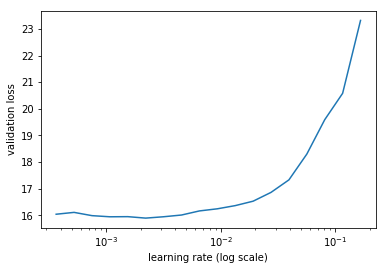

In [186]:
learn.lr_find(lrs/1000,1.)
learn.sched.plot(n_skip_end=1)

In [187]:
learn.fit(lrs, 1, cycle_len=10, use_clr=(20,10))

epoch      trn_loss   val_loss                            
    0      18.498925  32.647259 
    1      20.611391  27.680152                           
    2      20.352967  21.161584                           
    3      19.172848  19.404382                           
    4      17.644798  18.399955                           
    5      16.419074  17.308843                           
    6      15.206733  17.32422                            
    7      14.230509  16.746846                           
    8      13.275806  16.556435                           
    9      12.564042  16.318558                           


[array([16.31856])]

In [188]:
learn.save('fl0')

In [189]:
learn.load('fl0')

In [190]:
learn.freeze_to(-2)
learn.fit(lrs/4, 1, cycle_len=10, use_clr=(20,10))

epoch      trn_loss   val_loss                            
    0      11.586484  16.664614 
    1      11.806604  16.870573                           
    2      11.674171  16.854357                           
    3      11.34269   16.985243                           
    4      10.910382  16.598266                           
    5      10.553905  16.496393                           
    6      10.226028  16.403887                           
    7      9.884281   16.205676                           
    8      9.585815   16.341934                           
    9      9.333212   16.251312                           


[array([16.25131])]

In [191]:
learn.save('drop4')

In [192]:
learn.load('drop4')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


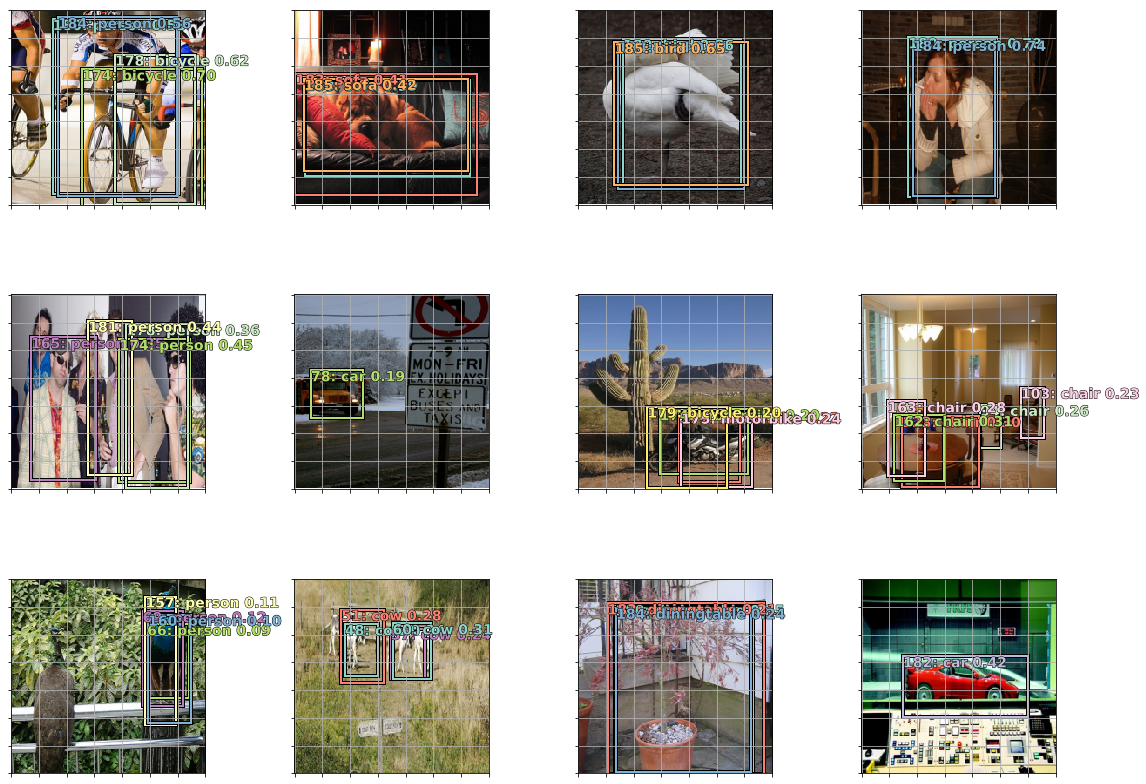

In [193]:
plot_results(0.75)

## NMS

In [194]:
def nms(boxes, scores, overlap=0.5, top_k=100):
    keep = scores.new(scores.size(0)).zero_().long()
    if boxes.numel() == 0: return keep
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = torch.mul(x2 - x1, y2 - y1)
    v, idx = scores.sort(0)  # sort in ascending order
    idx = idx[-top_k:]  # indices of the top-k largest vals
    xx1 = boxes.new()
    yy1 = boxes.new()
    xx2 = boxes.new()
    yy2 = boxes.new()
    w = boxes.new()
    h = boxes.new()

    count = 0
    while idx.numel() > 0:
        i = idx[-1]  # index of current largest val
        keep[count] = i
        count += 1
        if idx.size(0) == 1: break
        idx = idx[:-1]  # remove kept element from view
        # load bboxes of next highest vals
        torch.index_select(x1, 0, idx, out=xx1)
        torch.index_select(y1, 0, idx, out=yy1)
        torch.index_select(x2, 0, idx, out=xx2)
        torch.index_select(y2, 0, idx, out=yy2)
        # store element-wise max with next highest score
        xx1 = torch.clamp(xx1, min=x1[i])
        yy1 = torch.clamp(yy1, min=y1[i])
        xx2 = torch.clamp(xx2, max=x2[i])
        yy2 = torch.clamp(yy2, max=y2[i])
        w.resize_as_(xx2)
        h.resize_as_(yy2)
        w = xx2 - xx1
        h = yy2 - yy1
        # check sizes of xx1 and xx2.. after each iteration
        w = torch.clamp(w, min=0.0)
        h = torch.clamp(h, min=0.0)
        inter = w*h
        # IoU = i / (area(a) + area(b) - i)
        rem_areas = torch.index_select(area, 0, idx)  # load remaining areas)
        union = (rem_areas - inter) + area[i]
        IoU = inter/union  # store result in iou
        # keep only elements with an IoU <= overlap
        idx = idx[IoU.le(overlap)]
    return keep, count

In [195]:
x,y = next(iter(md.val_dl))
y = V(y)
batch = learn.model(V(x))
b_clas,b_bb = batch
x = to_np(x)

In [140]:
def show_nmf(idx):
    ima=md.val_ds.ds.denorm(x)[idx]
    bbox,clas = get_y(y[0][idx], y[1][idx])
    a_ic = actn_to_bb(b_bb[idx], anchors)
    clas_pr, clas_ids = b_clas[idx].max(1)
    clas_pr = clas_pr.sigmoid()

    conf_scores = b_clas[idx].sigmoid().t().data

    out1,out2,cc = [],[],[]
    for cl in range(0, len(conf_scores)-1):
        c_mask = conf_scores[cl] > 0.25
        if c_mask.sum() == 0: continue
        scores = conf_scores[cl][c_mask]
        l_mask = c_mask.unsqueeze(1).expand_as(a_ic)
        boxes = a_ic[l_mask].view(-1, 4)
        ids, count = nms(boxes.data, scores, 0.4, 50)
        ids = ids[:count]
        out1.append(scores[ids])
        out2.append(boxes.data[ids])
        cc.append([cl]*count)
    if not cc:
        print(f"{i}: empty array")
        return
    cc = T(np.concatenate(cc))
    out1 = torch.cat(out1)
    out2 = torch.cat(out2)

    fig, ax = plt.subplots(figsize=(8,8))
    torch_gt(ax, ima, out2, cc, out1, 0.1)

In [141]:
for i in range(12): show_nmf(i)

ValueError: operands could not be broadcast together with shapes (64,224,3,224) (3,) 

## End

In [142]:
for i in range(20,30): show_nmf(i)

ValueError: operands could not be broadcast together with shapes (64,224,3,224) (3,) 